## EDA for 'Tweets about the Top Companies from 2015 to 2020' dataset
Start by loading the three csv files and creating a dataframe that includes all tweets about microsoft:

In [59]:
import pandas as pd

# Step 1: Read the CSV files
company_df = pd.read_csv('Company.csv')
company_tweet_df = pd.read_csv('Company_Tweet.csv')
tweet_df = pd.read_csv('Tweet.csv')

# Step 2: Merge Company and Company_Tweet on ticker_symbol
merged_df = pd.merge(company_df, company_tweet_df, on='ticker_symbol')

# Step 3: Filter for rows where company_name is 'Microsoft'
microsoft_tweets = merged_df[merged_df['company_name'] == 'Microsoft']

# Step 4: Merge the filtered DataFrame with Tweet.csv on tweet_id
microsoft_tweet_details = pd.merge(microsoft_tweets, tweet_df, on='tweet_id')

# microsoft_tweet_details now contains all columns from Tweet.csv for tweets where company_name is 'Microsoft'


In [60]:
microsoft_tweet_details.head()

,ticker_symbol,company_name,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,MSFT,Microsoft,550444112328261632,GetAOM,1420071077,$UNP $ORCL $QCOM $MSFT $AAPL Top scoring mega ...,0,0,0
1,MSFT,Microsoft,550455355134578688,BoilerWarrior,1420073758,"http://StockAviator.com....Top penny stocks, N...",0,0,0
2,MSFT,Microsoft,550455384734183424,StocksThatDoubl,1420073765,Want alerts for momentum stocks about to run? ...,0,0,0
3,MSFT,Microsoft,550466945061908482,The_Dumb_Money,1420076521,"IMHO, $MSFT shockingly remains MILDLY undervalued",1,0,0
4,MSFT,Microsoft,550468859879505921,UnderGradStocks,1420076978,@CNNMoney I like $MSFT with him in charge. He ...,0,0,0


In [61]:
microsoft_tweet_details['post_date'].head()

0    1420071077
1    1420073758
2    1420073765
3    1420076521
4    1420076978
Name: post_date, dtype: int64

this is on the format 'seconds since epoch', convert to date:

In [62]:
# Assuming microsoft_tweet_details['post_date'] contains the epoch time
microsoft_tweet_details['post_date'] = pd.to_datetime(microsoft_tweet_details['post_date'], unit='s')

# Now, 'post_date' contains datetime objects
print(microsoft_tweet_details['post_date'].head())


0   2015-01-01 00:11:17
1   2015-01-01 00:55:58
2   2015-01-01 00:56:05
3   2015-01-01 01:42:01
4   2015-01-01 01:49:38
Name: post_date, dtype: datetime64[ns]


In [63]:
# Assuming microsoft_tweet_details['post_date'] contains the epoch time
tweet_df['post_date'] = pd.to_datetime(tweet_df['post_date'], unit='s')

# Now, 'post_date' contains datetime objects
print(tweet_df['post_date'].head())


0   2015-01-01 00:00:57
1   2015-01-01 00:01:36
2   2015-01-01 00:01:50
3   2015-01-01 00:06:47
4   2015-01-01 00:10:05
Name: post_date, dtype: datetime64[ns]


In [64]:
print(microsoft_tweet_details['post_date'].tail())

375706   2019-12-31 23:00:03
375707   2019-12-31 23:11:23
375708   2019-12-31 23:13:22
375709   2019-12-31 23:32:02
375710   2019-12-31 23:55:37
Name: post_date, dtype: datetime64[ns]


See that the first tweet is from just after midnight, 1st of jan 2015 and the last just before midnight 31 dec 2019!

In [65]:
microsoft_tweet_details['retweet_num'].max()

989

In [66]:
microsoft_tweet_details['like_num'].max()

896

In [67]:
tweet_df['like_num'].max()

999

In [68]:
tweet_df['retweet_num'].max()

999

In [69]:
tweet_df['comment_num'].max()

631

In [70]:
microsoft_tweet_details.describe()

,tweet_id,comment_num,retweet_num,like_num
count,3.757110e+05,375711.000000,375711.000000,375711.000000
mean,8.684576e+17,0.110545,0.514662,0.924966
std,1.774468e+17,0.799367,6.885645,7.935162
min,5.504441e+17,0.000000,0.000000,0.000000
25%,7.376574e+17,0.000000,0.000000,0.000000
50%,8.475427e+17,0.000000,0.000000,0.000000
75%,1.009554e+18,0.000000,0.000000,0.000000
max,1.212160e+18,165.000000,989.000000,896.000000


(0.0, 10.0)

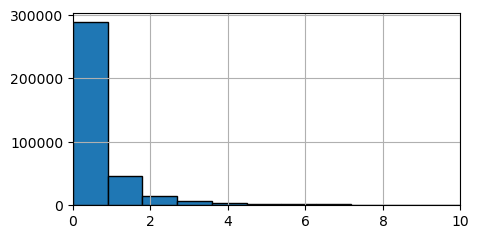

In [71]:
import matplotlib.pyplot as plt

microsoft_tweet_details['like_num'].hist(figsize=(5, 2.5), bins=1000, edgecolor="black")
#plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.xlim((0,10))

<Axes: >

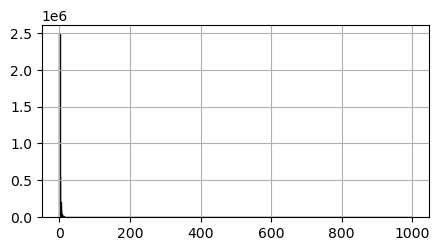

In [72]:
import matplotlib.pyplot as plt

tweet_df['like_num'].hist(figsize=(5, 2.5), bins=1000, edgecolor="black")
#plt.subplots_adjust(hspace=0.7, wspace=0.4)
#plt.xlim((0,10))

<Axes: xlabel='like_num'>

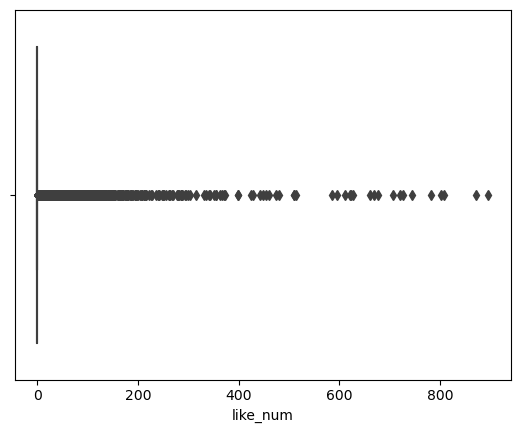

In [73]:
import seaborn as sns

sns.boxplot(x = microsoft_tweet_details['like_num'])

Time series analysis: trends over time:

In [74]:
microsoft_tweet_details['post_date'] = pd.to_datetime(microsoft_tweet_details['post_date'])
microsoft_tweet_details.set_index('post_date', inplace=True)

<Axes: xlabel='post_date'>

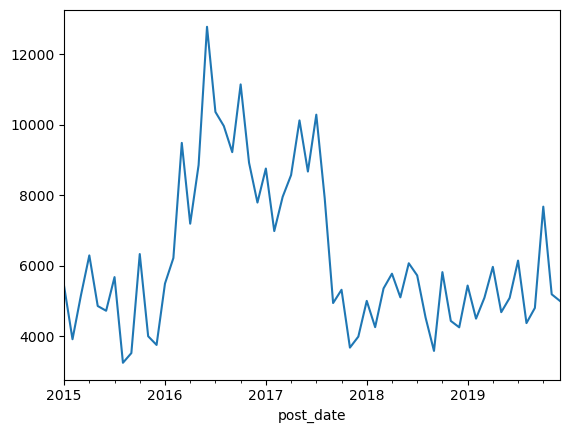

In [75]:
microsoft_tweet_details.resample('M').size().plot()

<Axes: xlabel='hour'>

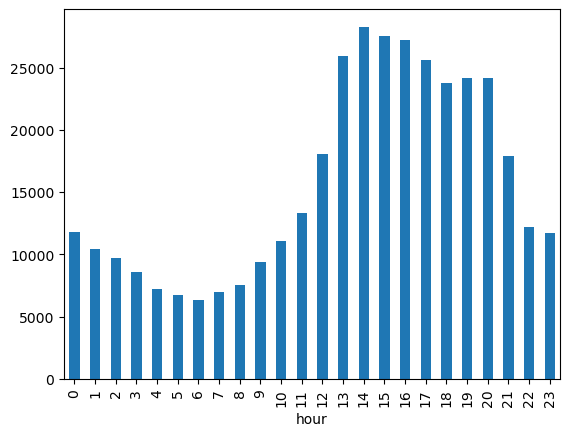

In [76]:
microsoft_tweet_details['hour'] = microsoft_tweet_details.index.hour
microsoft_tweet_details.groupby('hour').size().plot(kind='bar')

See that most of the tweets are between 13:00 and 20:00!

Text analysis:

Start with word frequency analysis:

In [77]:
from collections import Counter
import re

words = re.findall(r'\w+', ' '.join(microsoft_tweet_details['body']).lower())
word_counts = Counter(words)
print(word_counts.most_common(10))

[('msft', 400384), ('http', 198225), ('microsoft', 185305), ('com', 108579), ('us', 106171), ('more', 105511), ('to', 103058), ('the', 100582), ('read', 94994), ('owler', 92074)]


See that the most common are from links (com, http etc.), referencing microsoft (msft, microsoft), and then filler words (us, more, to, the...) so this doesnt really tell us anything.

Sentiment analysis:

Here's a brief explanation of what the code does:

 - It initializes the VADER Sentiment Intensity Analyzer.
 - It applies the analyzer to each row in the 'body' column to get a dictionary of scores in four categories: negative, neutral, positive, and compound. The compound score is a sum of all the lexicon ratings, which have been standardized to range between -1 (most extreme negative) and +1 (most extreme positive).
 - It extracts the compound score for each tweet and determines the sentiment type based on this score. The thresholds are customizable but generally, a compound score above 0 is considered positive, below 0 is considered negative, and exactly 0 is considered neutral.
 - Finally, it prints the count of each sentiment type and shows the first few rows with their respective sentiment analysis results.

In [78]:
#pip install nltk

In [79]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ingam\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [80]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Assuming microsoft_tweet_details['body'] contains the text of the tweets
# Apply the sentiment analysis
tweet_df['sentiments'] =tweet_df['body'].apply(sia.polarity_scores)

# Extract compound scores representing a normalized, weighted composite score
tweet_df['compound'] = tweet_df['sentiments'].apply(lambda x: x['compound'])

# Determine sentiment based on the compound score
tweet_df['sentiment_type'] = tweet_df['compound'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))

# View the distribution of sentiment types
print(tweet_df['sentiment_type'].value_counts())

# View the first few rows to verify
print(tweet_df[['body', 'compound', 'sentiment_type']].head())


neutral     1609287
positive    1440945
negative     667732
Name: sentiment_type, dtype: int64
                                                body  compound sentiment_type
0  lx21 made $10,008  on $AAPL -Check it out! htt...    0.0000        neutral
1  Insanity of today weirdo massive selling. $aap...   -0.8271       negative
2  S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...    0.0000        neutral
3  $GM $TSLA: Volkswagen Pushes 2014 Record Recal...    0.0000        neutral
4  Swing Trading: Up To 8.91% Return In 14 Days h...    0.0000        neutral


In [81]:
# View the first few rows to verify
print(tweet_df[['post_date', 'body', 'compound', 'sentiment_type']].head())

            post_date                                               body  \
0 2015-01-01 00:00:57  lx21 made $10,008  on $AAPL -Check it out! htt...   
1 2015-01-01 00:01:36  Insanity of today weirdo massive selling. $aap...   
2 2015-01-01 00:01:50  S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...   
3 2015-01-01 00:06:47  $GM $TSLA: Volkswagen Pushes 2014 Record Recal...   
4 2015-01-01 00:10:05  Swing Trading: Up To 8.91% Return In 14 Days h...   

   compound sentiment_type  
0    0.0000        neutral  
1   -0.8271       negative  
2    0.0000        neutral  
3    0.0000        neutral  
4    0.0000        neutral  


In [82]:
tweet_df['compound'].max()

0.9934

In [83]:
tweet_df['compound'].min()

-0.998

Get average sentiment score per day:
 - Here we aren't weighing anything just the average

Commenting the next few things out because i dont want to set post_date as an index before merging I think. Maybe would've been smarter to merge everything right at the beginning...

In [84]:
# Assuming tweet_df['post_date'] contains epoch times converted to datetime
# And tweet_df is your DataFrame with a 'compound' column for sentiment scores

# Set 'post_date' as the DataFrame index if it's not already
#tweet_df.set_index('post_date', inplace=True)

# Resample to daily frequency, calculating the mean of the compound scores for each day
#daily_sentiment = tweet_df['compound'].resample('D').mean()

# The resulting Series, daily_sentiment, contains dates as the index and the average compound scores as the values
#print(daily_sentiment.head())


In [85]:
#plt.figure(figsize=(15,5))
#plt.plot(daily_sentiment)

Weighing:
 - Weigh by importance of company
    - Based on market value? 'market importance' -> how would that be measured?
    - Weigh based on volume traded? or weigh based on number of tweets? 
        - Could factor in the number of tweets per day normalized by the total number of tweets for that company
 - Weigh tweets by number likes/retweets/comments
 
- *Should we also weigh the importance of each day? Like if the sentiment is super extreme, but the number of tweets was very low that day (like only 50 tweets but all super positive), should we weigh it as not as telling as if there was a greater volume of tweets, so the score wouldn't be 1 it would be a bit more neutral?*

In [86]:
import numpy as np

In [87]:
# Step 1: Calculate the total interactions for each tweet
#tweet_df['total_interactions'] = tweet_df['like_num'] + tweet_df['comment_num'] + tweet_df['retweet_num'] + 1

# Step 2: Calculate the weighted compound score for each tweet
#tweet_df['weighted_compound'] = tweet_df['compound'] * tweet_df['total_interactions']

# Group by date
# Step 3: Sum the weighted compound scores and total interactions for each day
#daily_summaries = tweet_df.resample('D').agg({
#    'weighted_compound': 'sum',
#    'total_interactions': 'sum'
#})

# Step 4: Calculate the weighted average compound score for each day
#daily_summaries['weighted_average_compound'] = daily_summaries['weighted_compound'] / daily_summaries['total_interactions']

# Replace infinite values and NaN (which might occur if a day has 0 total interactions) with 0 or another suitable value
#daily_summaries['weighted_average_compound'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

# The resulting DataFrame, daily_summaries, now includes the weighted average compound score for each day
#print(daily_summaries['weighted_average_compound'].head())


In [88]:
#plt.plot(daily_summaries['weighted_average_compound'])

In [89]:
#plt.plot(daily_summaries['weighted_average_compound'])

In [90]:
#tweet_df['weighted_compound'].apply(lambda x: 1 if x != 0 else 0).sum()

In [91]:
#tweet_df['weighted_compound'].apply(lambda x: 1 if x != 0 else 0).sum()

In [92]:
#tweet_df.head()

In [93]:
#company_tweet_df.head()

In [94]:
#company_df.head()

Note: replacing with 0 maybe not relevant??? look into

In [95]:
#tweet_df.head()

In [96]:
import pandas as pd
import numpy as np

# Assuming company_df, company_tweet, and tweet_df are already defined

# Step 1: Merge tweet_df with company_tweet on 'tweet_id'
tweets_with_company = pd.merge(tweet_df, company_tweet_df, on='tweet_id')

# Step 2: Merge the resulting DataFrame with company_df on 'ticker_symbol'
tweets_with_company = pd.merge(tweets_with_company, company_df, on='ticker_symbol')

# Step 3: Calculate total interactions for each tweet
tweets_with_company['total_interactions'] = tweets_with_company['like_num'] + tweets_with_company['comment_num'] + tweets_with_company['retweet_num']

# Step 4: Calculate weighted compound score for each tweet
tweets_with_company['weighted_compound'] = tweets_with_company['compound'] * tweets_with_company['total_interactions']

# Ensure 'post_date' is a datetime index
tweets_with_company['post_date'] = pd.to_datetime(tweets_with_company['post_date'], unit='s')
tweets_with_company.set_index('post_date', inplace=True)

# Step 5: Group by date and company, summing weighted compound scores and total interactions
daily_company_summaries = tweets_with_company.groupby([pd.Grouper(freq='D'), 'company_name']).agg({
    'weighted_compound': 'sum',
    'total_interactions': 'sum'
})

# Step 6: Calculate the weighted average compound score for each group
daily_company_summaries['weighted_average_compound'] = daily_company_summaries['weighted_compound'] / daily_company_summaries['total_interactions']

# Replace infinite values and NaN with 0
daily_company_summaries['weighted_average_compound'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

# The resulting DataFrame now includes the weighted average compound score for each day for each company
print(daily_company_summaries[['weighted_average_compound']].head())


                         weighted_average_compound
post_date  company_name                           
2015-01-01 Amazon.com                    -0.225121
           Google Inc                     0.292127
           Microsoft                      0.200854
           Tesla Inc                      0.164356
           apple                          0.251431


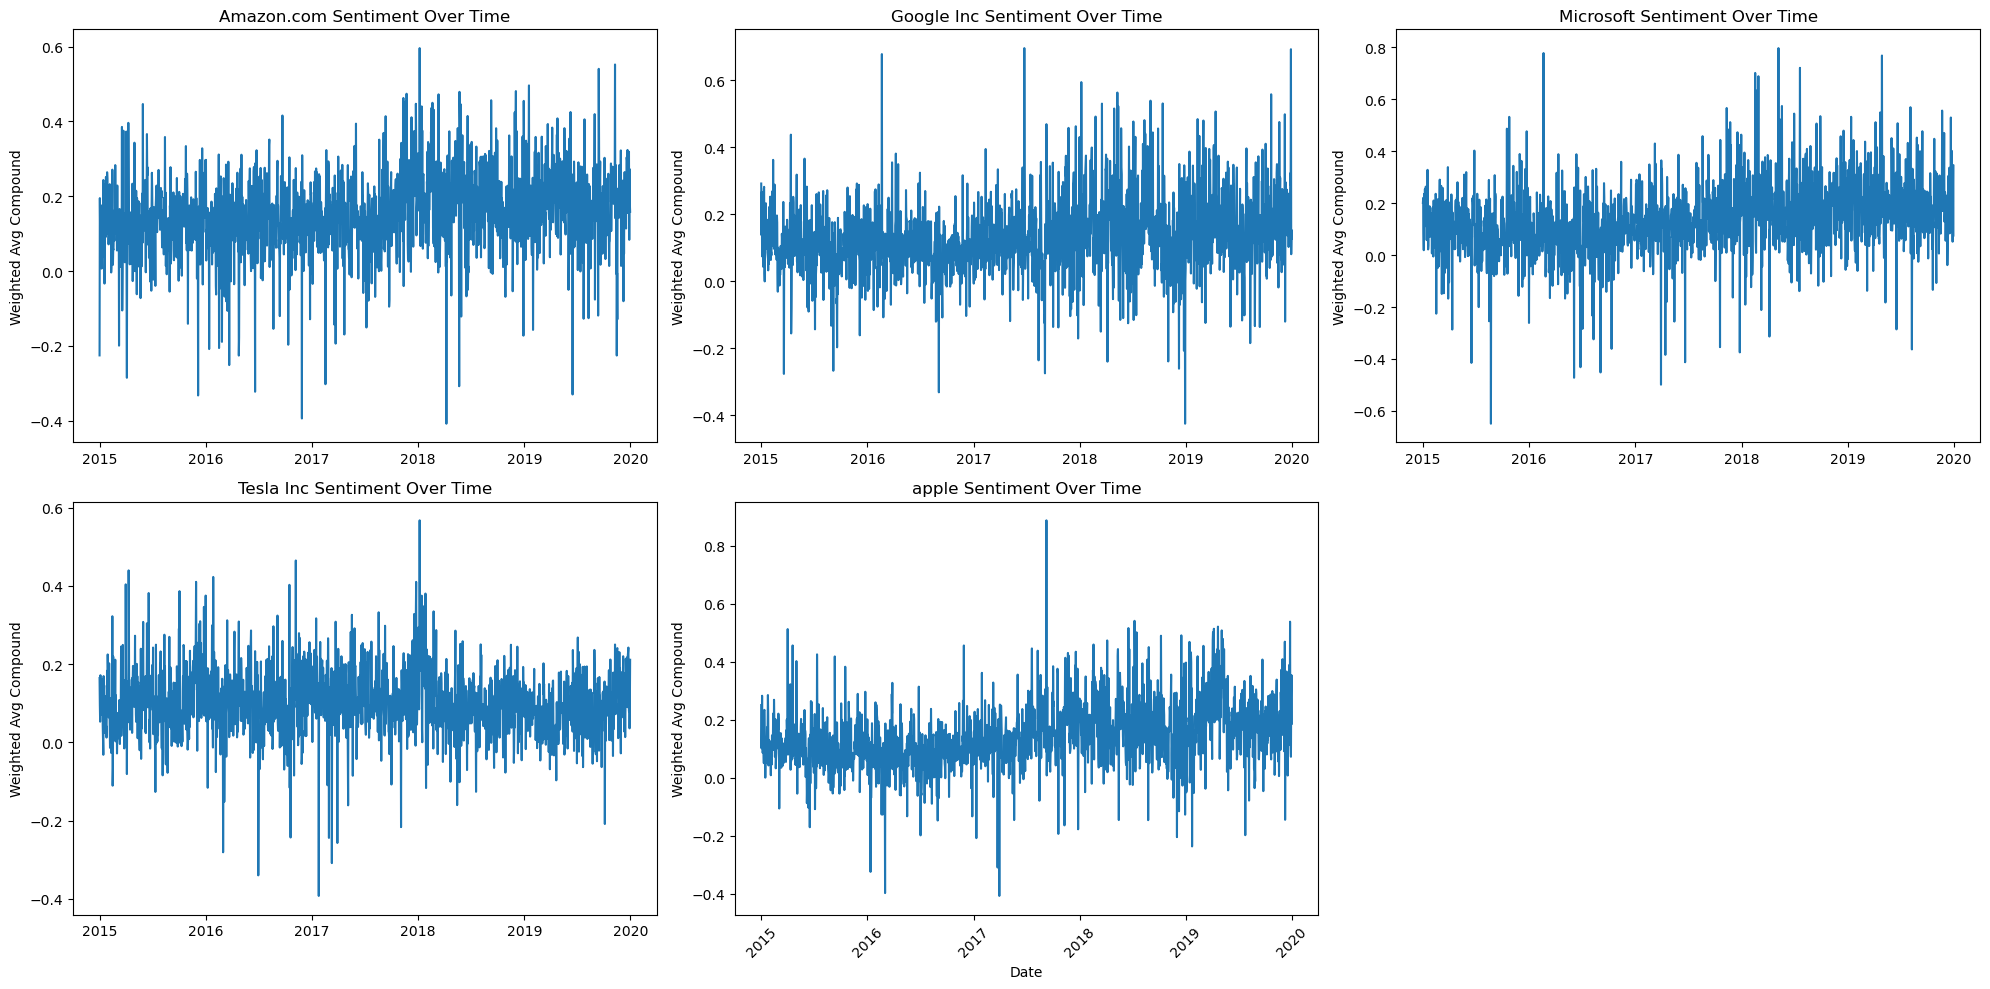

In [104]:
import matplotlib.pyplot as plt

# Assuming daily_company_summaries is your DataFrame with 'company_name' and dates as indices (from the previous step)

# Reset index to use 'company_name' and 'post_date' as columns
daily_company_summaries_reset = daily_company_summaries.reset_index()

# Get unique list of companies
companies = daily_company_summaries_reset['company_name'].unique()

# Set up the matplotlib figure and axes
#fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True)

plt.figure(figsize=(20,10))
# Plot each company's data on a separate subplot
for i, company in enumerate(companies):
    # Filter the DataFrame for the current company
    data = daily_company_summaries_reset[daily_company_summaries_reset['company_name'] == company]
    
    # Plot on ith subplot
    plt.subplot(2,3,i+1)
    plt.plot(data['post_date'], data['weighted_average_compound'], label=f'{company} Sentiment')
    plt.title(f'{company} Sentiment Over Time')
    plt.ylabel('Weighted Avg Compound')
    
# Set common labels
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
